## Artículo 01

### The NumPy array: a structure for efficient numerical computation

Van Der Walt, S., Colbert, S. C., &amp; Varoquaux, G. (2011). The NumPy array: A
structure for efficient numerical computation. Computing in Science and
Engineering, 13(2), 22-30. https://doi.org/10.1109/MCSE.2011.37

https://www.researchgate.net/publication/224223550_The_NumPy_Array_A_Structure_for_Efficient_Numerical_Computation

En este artículo se presenta la estructura *ndarray* de NumPy, y se hace un estudio sobre su uso y cómo mejora el rendimiento de ciertas operaciones matemáticas para la computación numérica.

Se hace una breve introducción al *Broadcasting* como técnica que usa NumPy para realizar operaciones artiméticas sobre dos o más arrays con distintas dimensiones. 

- Actividad 01.01 - Ampliar dicha explicación, aportando posibles restricciones o limitaciones a dicho sistema y ejemplos propios de los casos de uso.

También se introduce el trabajo con ficheros usando memoria mapeada.

- Actividad 01.02 - Verificar la eficacia y mejora posible de rendimiento del uso de dicha técnica sobre ndarrays de tamaños grandes.

## <center> Actividad 01.01</center>
--- 

El uso del *Broadcasting* en Numpy y ayuda a realizar operaciones aritméticas entre matrices de distintas dimensiones. Esto resulta muy útil cuando se quiere **realizar cualquier operación sobre un escalar o sobre una matriz cuya dimensión sea un subconjunto válido de la anterior**. ¿Qué entendemos por un subconjunto válido?

Numpy presenta la regla del *Broadcasting*. Esta regla limita el uso de esta operación entre *ndarrays* de la siguiente manera:

- La operación se realiza con un escalar (dimensión 1)
- La operación se realiza entre dos matrizes cuyas dimensiones (calculadas de atrás hacia delante) son iguales:

Para exponer de manera más clara esta segunda regla vamos a imaginar dos matrices A y B. 

    Dimensión de A = (Ai, Aj, Ak)
    Dimensión de B = (Bi, Bj)

Para que *Numpy* pueda aplicar *Broadcasting* a una operación entre estas dos matrices se debe cumplir lo que: 
    
    Ak = Bj
    Aj = Bi

Dentro de esta segunda regla estarían incluidas las operaciones entre matrices cuya ultima dimensión sea igual a a la dimensión del vector con el que operan. Sea una matriz A y un vector v

    Dimensión de A = (Ai, Aj, Ak)
    Dimensión de v = vi

Se debe cumplir que:

    Ak = vi

Pasemos a presentar ejemplos:


### Caso válido 1: operación con un escalar

![Matriz por escalar](https://2.bp.blogspot.com/-Baqf02hjMUY/VvV0BNH3-mI/AAAAAAAABQo/y_VLwo57700CWgsiFK3_USKU0x9gyx2Ow/s280/multiplicar-una-matriz-por-un-escalar-en%2Bjava.jpg)

In [ ]:
import numpy as np

A = np.arange(9).reshape(3, 3)          # Matriz de dimensiones 3x3
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

b = 5                                   # Escalar
print('\nEscalar b =', b)


print('\nBroadcast válido, operacion de Matriz con escalar\n\n', A, '*', b, '=\n\n', A*b)

Cualquier tipo de dimensión sería valida para operar junto a un escalar:

In [ ]:
A = np.arange(24).reshape(3, 2, 4)      # Matriz de dimensiones 3x2x4
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

b = 5                                   # Escalar
print('\nEscalar b =', b)


print('\nBroadcast válido, operacion de Matriz con escalar\n\n', A, '*', b, '=\n\n', A*b)

### Caso válido 2: operación con matriz de dimensiones válidas

![Matriz por matriz](https://numpy.org/devdocs/_images/theory.broadcast_2.gif)

**Matriz y vector**

In [ ]:
### Matriz y vector ###

A = np.arange(10).reshape(2, 5)         # Matriz de dimensiones 2x5
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

v = np.arange(5)                        # Vector de dimension (5)
print('\nVector v =', v)
print('\nDimensiones de v:', v.shape)


print('\nBroadcast válido, operacion de Matriz con vector\n\n', A, '*', v, '=\n\n', A*v) # Operación válida

**Matriz y matriz de dimensiones válidas**

In [ ]:
### Matriz y matriz de dimensiones válidas ###

A = np.arange(30).reshape(2, 5, 3)      # Matriz de dimensiones 2x5x3
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

B = np.arange(15).reshape(5, 3)         # Matriz de dimensiones 5x3
print('\nMatriz B =', B)
print('\nDimensiones de B:', B.shape)

# Vamos a definir una función que toma dos matrizes y comprueba que sus dimensiones últimas son iguales:
# Esta función basicamente compara las dimensiones de las dos matrices de atras hacia delante usando slicing. 
# Usa el numero de dimensiones (1, 2 o 3) de la menor matriz como límite

def broadcastable_matrixes(A, B):
    if (len(A.shape) > len(B.shape)):
        return B.shape[-len(B.shape):] == A.shape[-len(B.shape):]
    else:
        return B.shape[-len(A.shape):] == A.shape[-len(A.shape):]


# Comprobamos que las dimensiones últimas de las dos matrices son iguales

print('\nLas matrices son broadcastable?:')
print(broadcastable_matrixes(A, B))


print('\nBroadcast válido, operacion de Matriz con Matriz subconjunto válido\n\n', A, '*\n\n', B, '=\n\n', A*B) # Operación válida

### Caso no válido 1: Matriz y vector de dimensiones NO válidas

Se expone a continuación un ejemplo donde una matriz y un vector no son Broadcastable. No tienen dimensiones válidas

![Matriz por matriz](https://numpy.org/devdocs/_images/theory.broadcast_3.gif)

In [ ]:
### Matriz y vector no válido ###

A = np.arange(10).reshape(2, 5)         # Matriz de dimensiones 2x5
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

v = np.arange(3)                        # Vector de dimension (3)
print('\nVector v =', v)
print('\nDimensiones de v:', v.shape)

# Operación no válida: ValueError: operands could not be broadcast together with shapes (2,5) (3,)
print('\nBroadcast válido, operacion de Matriz con vector\n\n', A, '*', v, '=\n\n', A*v) 

### Caso no válido 2: Matriz y matriz de dimensiones NO válidas

Se expone a continuación ejemplos donde una matriz y otra matriz no son Broadcastable. No tienen dimensiones válidas

In [ ]:
### Matriz y matriz de dimensiones no válidas ###

A = np.arange(30).reshape(2, 5, 3)      # Matriz de dimensiones 2x5x3
print('Matriz A =\n\n', A)
print('\nDimensiones de A:', A.shape)

B = np.arange(15).reshape(3, 5)         # Matriz de dimensiones 3x5
print('\nMatriz B =', B)
print('\nDimensiones de B:', B.shape)

# Comprobamos que las dimensiones últimas de las dos matrices son iguales

print('\nLas matrices son broadcastable?:')
print(broadcastable_matrixes(A, B))

 # Operación no válida: ValueError: operands could not be broadcast together with shapes (2,5,3) (3,5)
print('\nBroadcast válido, operacion de Matriz con Matriz subconjunto válido\n\n', A, '*\n\n', B, '=\n\n', A*B) # Operación válida

## <center> Actividad 01.02</center>
--- 

### Eficacia sobre ndarrays de tamaños grandes

A continuación se presenta una gráfica y una tabla donde se puede ver el comportamiento de la velocidad de acceso a un *ndarray* sin el uso de *memmap* y con el uso de *memmap*.

La mejora de *memmap* es clara, ofreciendo mejoras de rendimiento 9 veces mayor sobre un acceso a un array completo.

Además, cuanto mayor se hace el array mayor es la mejora obtenida.

In [ ]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

# Se usan varias dimensiones de arrays cuyas raices cubicas sean enteros para poder formar ndarrays de 3 dimensiones que hacen más complejo su acceso
array_dim = np.power(np.arange(10, 501, 10), 3)

dataset_size = len(array_dim)

# Arrays que almacenan los tiempos de acceso según cada método (ndarray vs memmap)
tiempos_ndarray = np.zeros(dataset_size)
tiempos_memmap = np.zeros(dataset_size)

# Se itera sobre un ndarray
for iter in range(dataset_size):
    size = array_dim[iter]
    size_per_axis = int(size**(1/3)) + 1
    a1 = np.arange(size).reshape(size_per_axis, size_per_axis, size_per_axis)
    
    # Calculamos el tiempo  medio de 5 accesos al array
    t1 = time()
    for i in range(5):
        view = np.array(a1[::, ::, ::])
    t1 = ((time() - t1) / 5) * 1000
    tiempos_ndarray[iter] = t1

# Tabla no memmap
print('TABLA TIEMPOS SIN MEMMAP\n')
df_ndarray = pd.DataFrame({"Array dimension": array_dim, "Time (ms)": tiempos_ndarray, "Time (ms) SUM": np.cumsum(tiempos_ndarray)})
display(df_ndarray)


# Se itera sobre un ndarray con memmap
for iter in range(dataset_size):
    size = array_dim[iter]
    size_per_axis = int(size**(1/3)) + 1
    a2 = np.memmap('/tmp/myarray2.memmap', mode='write', shape=(size_per_axis, size_per_axis, size_per_axis))

    # Calculamos el tiempo  medio de 5 accesos al array
    t2 = time() 
    for i in range(5):
        view = np.array(a2[::, ::, ::])
    t2 = ((time() - t2) / 5) * 1000
    tiempos_memmap[iter] = t2

# Tabla memmap
print('\n\nTABLA TIEMPOS CON MEMMAP\n')
df_memmap = pd.DataFrame({"Array dimension": array_dim, "Time (ms)": tiempos_memmap, "Time (ms) SUM": np.cumsum(tiempos_memmap)})
display(df_memmap)


#Plot
plt.plot(array_dim, tiempos_ndarray, label="ndarray")
plt.plot(array_dim, tiempos_memmap, label="memmap")

#Estilo
plt.rcParams['figure.figsize'] = (10,10)

#Leyenda
plt.ylabel('Tiempo')
plt.xlabel('Dimensión del array')
plt.legend(loc="upper left")

plt.show()


ndarraymean = np.mean(tiempos_ndarray)
memmapmean = np.mean(tiempos_memmap)
improve = ndarraymean/memmapmean * 100

print('\nTiempo medio de acceso sin memmap: ', ndarraymean, 'ms')
print('\nTiempo medio de acceso con memmap: ', memmapmean, 'ms')
print("\nEl uso de memmap ha supuesto un {:.2f}%, del acceso sin memmap".format(improve))

## Comportamiento usando slicing sobre una dimension N
Se puede observar sin embargo como el acceso a traves de slicing a dimensiones concretas empeora el rendimiento de memmap. Esto es debido a su comportamiento de lecutra de bloques completos en su búsqueda de valores dentro de las dimensiones solicitadas, teniendo que leer bloques enteros para acceder a solo un valor del mismo.

TABLA TIEMPOS SIN MEMMAP



,Array dimension,Time (ms),Time (ms) SUM
0,1000,3.351164,3.351164
1,8000,0.004625,3.355789
2,27000,0.038624,3.394413
3,64000,0.008059,3.402472
4,125000,0.003433,3.405905
5,216000,0.003958,3.409863
6,343000,0.013208,3.423071
7,512000,0.007010,3.430080
8,729000,0.014400,3.444481
9,1000000,0.015736,3.460217




TABLA TIEMPOS CON MEMMAP



,Array dimension,Time (ms),Time (ms) SUM
0,1000,0.061798,0.061798
1,8000,0.082016,0.143814
2,27000,0.086975,0.230789
3,64000,0.145388,0.376177
4,125000,0.123835,0.500011
5,216000,0.167656,0.667667
6,343000,0.154972,0.822639
7,512000,0.175762,0.998402
8,729000,0.167418,1.165819
9,1000000,0.149202,1.315022



Tiempo medio de acceso sin memmap:  0.5354270935058594 ms

Tiempo medio de acceso con memmap:  0.20908641815185547 ms

El uso de memmap ha supuesto un 256.08%, del acceso sin memmap


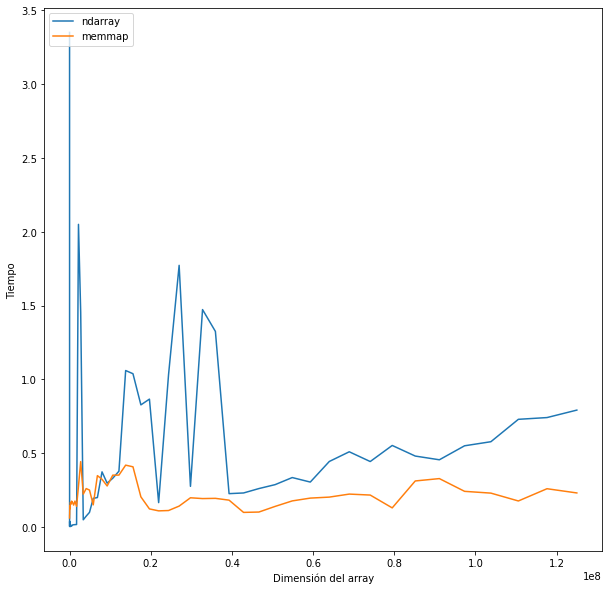

In [27]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

# Se usan varias dimensiones de arrays cuyas raices cubicas sean enteros para poder formar ndarrays de 3 dimensiones que hacen más complejo su acceso
array_dim = np.power(np.arange(10, 501, 10), 3)

dataset_size = len(array_dim)

# Arrays que almacenan los tiempos de acceso según cada método (ndarray vs memmap)
tiempos_ndarray = np.zeros(dataset_size)
tiempos_memmap = np.zeros(dataset_size)

# Se itera sobre un ndarray
for iter in range(dataset_size):
    size = array_dim[iter]
    size_per_axis = int(size**(1/3)) + 1
    a1 = np.arange(size).reshape(size_per_axis, size_per_axis, size_per_axis)
    
    # Calculamos el tiempo  medio de 5 accesos al array
    t1 = time()
    for i in range(5):
        view = np.array(a1[0, ::, ::]) # Acceso con axis bloqueado a 0
    t1 = ((time() - t1) / 5) * 1000
    tiempos_ndarray[iter] = t1

# Tabla no memmap
print('TABLA TIEMPOS SIN MEMMAP\n')
df_ndarray = pd.DataFrame({"Array dimension": array_dim, "Time (ms)": tiempos_ndarray, "Time (ms) SUM": np.cumsum(tiempos_ndarray)})
display(df_ndarray)


# Se itera sobre un ndarray con memmap
for iter in range(dataset_size):
    size = array_dim[iter]
    size_per_axis = int(size**(1/3)) + 1
    a2 = np.memmap('/tmp/myarray2.memmap', mode='write', shape=(size_per_axis, size_per_axis, size_per_axis))

    # Calculamos el tiempo  medio de 5 accesos al array
    t2 = time() 
    for i in range(5):
        view = np.array(a2[0, ::, ::]) # Acceso con axis bloqueado a 0
    t2 = ((time() - t2) / 5) * 1000
    tiempos_memmap[iter] = t2

# Tabla memmap
print('\n\nTABLA TIEMPOS CON MEMMAP\n')
df_memmap = pd.DataFrame({"Array dimension": array_dim, "Time (ms)": tiempos_memmap, "Time (ms) SUM": np.cumsum(tiempos_memmap)})
display(df_memmap)


#Plot
plt.plot(array_dim, tiempos_ndarray, label="ndarray")
plt.plot(array_dim, tiempos_memmap, label="memmap")

#Estilo
plt.rcParams['figure.figsize'] = (10,10)

#Leyenda
plt.ylabel('Tiempo')
plt.xlabel('Dimensión del array')
plt.legend(loc="upper left")

ndarraymean = np.mean(tiempos_ndarray)
memmapmean = np.mean(tiempos_memmap)
improve = ndarraymean/memmapmean*100

print('\nTiempo medio de acceso sin memmap: ', ndarraymean, 'ms')
print('\nTiempo medio de acceso con memmap: ', memmapmean, 'ms')
print("\nEl uso de memmap ha supuesto un {:.2f}%, del acceso sin memmap".format(improve))

plt.show()

Como podemos observar el uso de memmap para recorrer dimensiones concretas dejaría de ser útil. En este ejemplo accedemos a diferentes filas dejando las otras dos dimensiones fijas a valores concretos, el uso de memmap sobretodo en los primeros accesos muestra una clara deficiencia con respecto a un acceso a variable normal.

TABLA TIEMPOS SIN MEMMAP



,Array dimension,Time (ms),Time (ms) SUM
0,1000,0.013971,0.013971
1,8000,0.001383,0.015354
2,27000,0.002193,0.017548
3,64000,0.005579,0.023127
4,125000,0.003767,0.026894
...,...,...,...
75,438976000,0.005579,0.433159
76,456533000,0.005198,0.438356
77,474552000,0.005436,0.443792
78,493039000,0.005198,0.448990




TABLA TIEMPOS CON MEMMAP



,Array dimension,Time (ms),Time (ms) SUM
0,1000,0.006771,0.006771
1,8000,0.071430,0.078201
2,27000,0.091171,0.169373
3,64000,0.105047,0.274420
4,125000,0.089455,0.363874
...,...,...,...
75,438976000,0.075388,6.602430
76,456533000,0.074959,6.677389
77,474552000,0.078249,6.755638
78,493039000,0.039864,6.795502



Tiempo medio de acceso sin memmap:  0.0056803226470947266 ms

Tiempo medio de acceso con memmap:  0.08549392223358154 ms

El uso de memmap ha supuesto un 0.07%, del acceso sin memmap


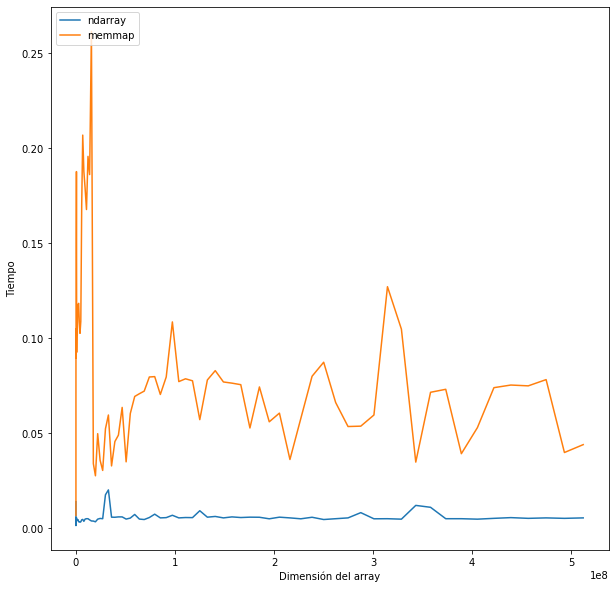

In [28]:
# Se usan varias dimensiones de arrays cuyas raices cubicas sean enteros para poder formar ndarrays de 3 dimensiones que hacen más complejo su acceso
array_dim = np.power(np.arange(10, 801, 10), 3)

dataset_size = len(array_dim)

# Arrays que almacenan los tiempos de acceso según cada método (ndarray vs memmap)
tiempos_ndarray = np.zeros(dataset_size)
tiempos_memmap = np.zeros(dataset_size)

# Se itera sobre un ndarray
for iter in range(dataset_size):
    size = array_dim[iter]
    size_per_axis = int(size**(1/3)) + 1
    a1 = np.arange(size).reshape(size_per_axis, size_per_axis, size_per_axis)
    
    # Calculamos el tiempo  medio de 5 accesos al array
    t1 = time()
    for i in range(5):
        view = np.array(a1[i, 0, 0]) # Acceso con todos los axis bloqueados, iteramos sobre el primero
    t1 = ((time() - t1) / 5) * 1000
    tiempos_ndarray[iter] = t1

# Tabla no memmap
print('TABLA TIEMPOS SIN MEMMAP\n')
df_ndarray = pd.DataFrame({"Array dimension": array_dim, "Time (ms)": tiempos_ndarray, "Time (ms) SUM": np.cumsum(tiempos_ndarray)})
display(df_ndarray)


# Se itera sobre un ndarray con memmap
for iter in range(dataset_size):
    size = array_dim[iter]
    size_per_axis = int(size**(1/3)) + 1
    a2 = np.memmap('/tmp/myarray2.memmap', mode='write', shape=(size_per_axis, size_per_axis, size_per_axis))

    # Calculamos el tiempo  medio de 5 accesos al array
    t2 = time() 
    for i in range(5):
        view = np.array(a2[i, 0, 0]) # Acceso con todos los axis bloqueados, iteramos sobre el primero
    t2 = ((time() - t2) / 5) * 1000
    tiempos_memmap[iter] = t2

# Tabla memmap
print('\n\nTABLA TIEMPOS CON MEMMAP\n')
df_memmap = pd.DataFrame({"Array dimension": array_dim, "Time (ms)": tiempos_memmap, "Time (ms) SUM": np.cumsum(tiempos_memmap)})
display(df_memmap)


#Plot
plt.plot(array_dim, tiempos_ndarray, label="ndarray")
plt.plot(array_dim, tiempos_memmap, label="memmap")

#Estilo
plt.rcParams['figure.figsize'] = (10,10)

#Leyenda
plt.ylabel('Tiempo')
plt.xlabel('Dimensión del array')
plt.legend(loc="upper left")

ndarraymean = np.mean(tiempos_ndarray)
memmapmean = np.mean(tiempos_memmap)
improve = ndarraymean/memmapmean

print('\nTiempo medio de acceso sin memmap: ', ndarraymean, 'ms')
print('\nTiempo medio de acceso con memmap: ', memmapmean, 'ms')
print("\nEl uso de memmap ha supuesto un {:.2f}%, del acceso sin memmap".format(improve))

## Librerías hyp5, pytables, y zarr

Sería interesante valorar el uso de librerías para poder controlar la compresión y fragmentación de bloques de memoria. Estas librerías permiten modificar estos valores para poder acceder de forma más personalizada a nuestros dataset así como ofrecer ciertas caracterísiticas como acceso en remoto a nuestros archivos.

## Artículo 02

### Data Structures for Statistical Computing in Python

McKinney, W. (2010). Data Structures for Statistical Computing in Python.
Proceedings of the 9th Python in Science Conference, December, 56-61.
https://doi.org/10.25080/majora-92bf1922-00a

https://www.researchgate.net/publication/265001241_Data_Structures_for_Statistical_Computing_in_Python

En este segundo artículo el creador de *pandas* introduce dicha librería en comparación con las estructuras nativas de R.

- Actividad 02.01 - Desarrollar una opinión razonada del estado actual de las herramientas de análisis de datos estadísticos en contraposición a como se muestran en el artículo, R vs Python vs SQL vs Others...

## <center> Actividad 02.01</center>
--- 

## Bibliografía
[Numpy, Broadcasting](https://numpy.org/devdocs/user/theory.broadcasting.html)

[Numpy, memmap](https://numpy.org/doc/stable/reference/generated/numpy.memmap.html)

[Zarr, documentation](https://zarr.readthedocs.io/en/stable/)

[Memmap vs HDF5/zarr](https://pythonspeed.com/articles/mmap-vs-zarr-hdf5/)